[[291   6  49  22  72   9  49]
 [ 11  33   3   2   2   1   0]
 [ 47   7 283  21  95  45  47]
 [ 22   0  18 751  30  14  46]
 [ 59   1  69  29 346   1  83]
 [ 11   0  54  31   4 301  13]
 [ 39   1  37  51  95  11 377]]


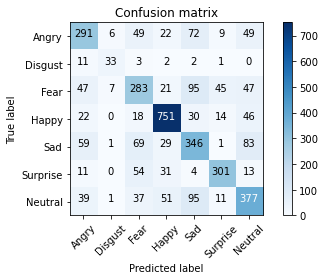

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import sklearn.metrics as metrics

y_true = np.load('./truey.npy')
y_pred = np.load('./predy.npy')
cm = confusion_matrix(y_true, y_pred)
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
title='Confusion matrix'
print(cm)

#confusion matrix

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [3]:
#classification report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.58      0.60       498
           1       0.69      0.63      0.66        52
           2       0.55      0.52      0.53       545
           3       0.83      0.85      0.84       881
           4       0.54      0.59      0.56       588
           5       0.79      0.73      0.76       414
           6       0.61      0.62      0.62       611

    accuracy                           0.66      3589
   macro avg       0.66      0.65      0.65      3589
weighted avg       0.66      0.66      0.66      3589



In [14]:
fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred, pos_label = 4)
roc_auc = metrics.auc(fpr, tpr) 